In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import cv2

**Dataset**

In [ ]:
train_dataset_path = '/content/drive/MyDrive/Datasets/Flowers/Train'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    brightness_range = (0.8, 1.2),
    zoom_range = 0.1,
    shear_range = 0.3,
    rotation_range = 10,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width, height),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'training'
)

val_data = idg.flow_from_directory(
    train_dataset_path,
    target_size = (width, height),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation'
)

**Show Data**

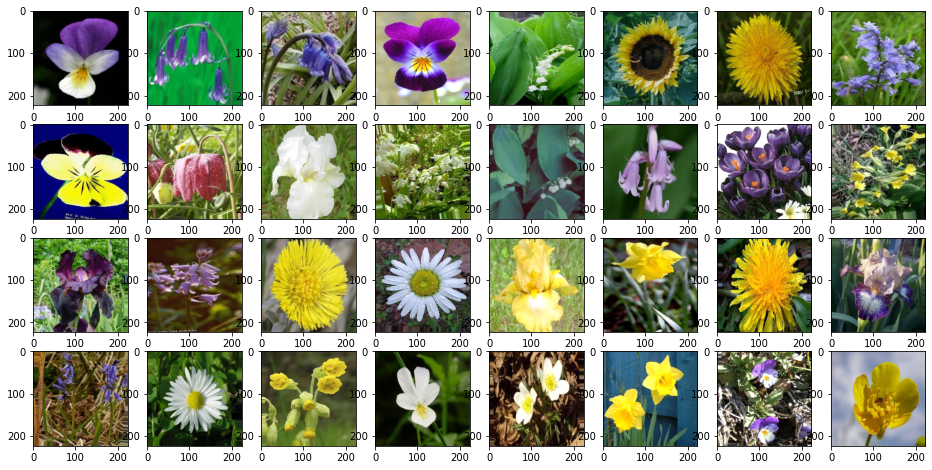

In [ ]:
some_images = next(train_data)

X = some_images[0]
Y = some_images[1]

plt.figure(figsize=(16, 8))

for i in range(32):
  plt.subplot(4, 8, i+1)
  plt.imshow(X[i])

## Model

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape = (width, height, 3),
)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),   
    Dense(17, activation='softmax')                    
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
model.fit(train_data, validation_data = val_data, epochs=10)

Epoch 1/10
28/28 [==============================] - 28s 971ms/step - loss: 5.0524 - accuracy: 0.3507 - val_loss: 1.1273 - val_accuracy: 0.6618
Epoch 2/10
28/28 [==============================] - 26s 941ms/step - loss: 0.6116 - accuracy: 0.8167 - val_loss: 0.5579 - val_accuracy: 0.8137
Epoch 3/10
28/28 [==============================] - 26s 944ms/step - loss: 0.2500 - accuracy: 0.9344 - val_loss: 0.4781 - val_accuracy: 0.8578
Epoch 4/10
28/28 [==============================] - 26s 946ms/step - loss: 0.1708 - accuracy: 0.9570 - val_loss: 0.4558 - val_accuracy: 0.8725
Epoch 5/10
28/28 [==============================] - 26s 936ms/step - loss: 0.0878 - accuracy: 0.9808 - val_loss: 0.4656 - val_accuracy: 0.8627
Epoch 6/10
28/28 [==============================] - 26s 933ms/step - loss: 0.0797 - accuracy: 0.9842 - val_loss: 0.3859 - val_accuracy: 0.8725
Epoch 7/10
28/28 [==============================] - 26s 937ms/step - loss: 0.0466 - accuracy: 0.9921 - val_loss: 0.4732 - val_accuracy: 0.8627

##**Test**

In [ ]:
test_dataset_path = '/content/drive/MyDrive/Datasets/Flowers/Test'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
)

test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width, height),
    class_mode = 'categorical',
    batch_size = batch_size,
)

In [ ]:
model.evaluate(test_data)

9/9 [==============================] - 3s 316ms/step - loss: 1.0492 - accuracy: 0.7279


[1.0491656064987183, 0.7279411554336548]

In [ ]:
model.save("/content/drive/MyDrive/Datasets/Flowers/flowersModel.h5")